<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Алина, доброго дня! рад приветствовать тебя вновь)<br />
(а дальше шаболонная обязательная часть, как ты заметил по другим спринтам)
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br>

# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

Нужно уменьшить количество признаков, чтобы было одинаковое количество в тестовой и валидационнной
В фул дата сете есть ответы для тестовой выборки, те в тестовой выборке нет целевой переменной
Rougher outs recovery - целевой, и естьеще один - на y, который тож нужен
Что-то зависит от времени
Индекс теста зависит от времени и попорядку, тест идет позднее, из фула вытацить n последних значений, равным по времени тесту. 


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_data = pd.read_csv('/datasets/gold_recovery_train.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full.csv')

In [4]:
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### После изучения трех датасетов видно, что все они разные. В фул содержится и тест и трейн. В тесте нет ряда признаков, эти признаки - это результаты процессов очистки. В каждом датасете есть нулевые значения, необходимо будет что-то с ними делать.

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b><br>
ОК, данные на базе)

### Заметно, что в тестовом датасете нет значений таргет, которые нам будут нужны в дальнейшем. Присоединяем

In [8]:
test_data['rougher.output.recovery'] = full_data.set_index('date').loc[test_data['date'],:].reset_index()['rougher.output.recovery']

In [9]:
test_data['rougher.output.recovery']

0       89.993421
1       88.089657
2       88.412756
3       87.360133
4       83.236367
          ...    
5851    95.172585
5852    94.575036
5853    93.018138
5854    92.599042
5855    91.177695
Name: rougher.output.recovery, Length: 5856, dtype: float64

In [10]:
test_data['final.output.recovery'] = full_data.set_index('date').loc[test_data['date'],:].reset_index()['final.output.recovery']

In [11]:
test_data['final.output.recovery']

0       70.273583
1       68.910432
2       68.143213
3       67.776393
4       61.467078
          ...    
5851    68.919891
5852    68.440582
5853    67.092759
5854    68.061186
5855    71.699976
Name: final.output.recovery, Length: 5856, dtype: float64

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>А можно было не присоединять. А фичи и таргет - отдельно создавать)

### Создадим временный датасет из трейндата, по которому будем считать эффективность обогащения. 

In [12]:
z = []
for element in train_data:
    if element in test_data:
        z.append(element)
        
print(z)        

['date', 'final.output.recovery', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.output.recovery', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher

In [13]:
new_train_data = train_data[['date', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level', 'secondary_cleaner.state.floatbank2_a_air', 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank2_b_air', 'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank3_b_air', 'secondary_cleaner.state.floatbank3_b_level', 'secondary_cleaner.state.floatbank4_a_air', 'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank4_b_air', 'secondary_cleaner.state.floatbank4_b_level', 'secondary_cleaner.state.floatbank5_a_air', 'secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank6_a_level']]

In [14]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 53 columns):
date                                          16860 non-null object
primary_cleaner.input.sulfate                 15553 non-null float64
primary_cleaner.input.depressant              15598 non-null float64
primary_cleaner.input.feed_size               16860 non-null float64
primary_cleaner.input.xanthate                15875 non-null float64
primary_cleaner.state.floatbank8_a_air        16820 non-null float64
primary_cleaner.state.floatbank8_a_level      16827 non-null float64
primary_cleaner.state.floatbank8_b_air        16820 non-null float64
primary_cleaner.state.floatbank8_b_level      16833 non-null float64
primary_cleaner.state.floatbank8_c_air        16822 non-null float64
primary_cleaner.state.floatbank8_c_level      16833 non-null float64
primary_cleaner.state.floatbank8_d_air        16821 non-null float64
primary_cleaner.state.floatbank8_d_level      16833 non-null flo

### Удалим из временного датасета все NAN и создадим колонку с показателем efficiency и посчитаем МАЕ между моими расчетами и значеним в таблице.

In [15]:
no_na_train_data = train_data.dropna()


In [16]:
A = train_data['rougher.output.concentrate_au']

In [17]:
B = train_data['rougher.input.feed_au']

In [18]:
C = train_data['rougher.output.tail_au']

In [19]:
train_data['efficiency'] = ((A*(B-C))/(B*(A-C)))*100

In [20]:
train_data_no_na = train_data.dropna().reset_index(drop=True)

### Ошибка получается довольно большой.. но что с этим делать, если честно, не оч ясно

In [21]:
mean_absolute_error(train_data_no_na['efficiency'],train_data_no_na['rougher.output.recovery'])

9.555596961987514e-15

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='red'><br>Если честно, 0 должен быть)<br> Ты попробуй ничего не делать с данными до этого расчёта. Также, можно вот такую функцию создаать... ну это как удобнее.

### <font color='orange'>У меня были неверные столбцы,столбцы заменила, ошибка упала, но не до нуля.</font>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u>
<font color='green'><br>
Вроде, всё верно: я просто загрузил данные, а потом - сразу к этим формулам - и сё вышло ОК. Т.е. фишка в том, что преобразований не должно быть)

In [22]:
def check_rougher_output_recovery(row):
    
    C = row['rougher.output.concentrate_au']
    F = row['rougher.input.feed_au']
    T = row['rougher.output.tail_au']
    
    if F * (C - T) == 0:
        return
    else: 
        recovery = (C * (F - T)) / (F * (C - T)) * 100
        
        return recovery

### Вернемся к датасетам, с которыми будем дальше работать. Заполним нули показателями соседних строк, поскольку видно, что данные с соседними временными отрезками отличаются не слишком сильно. А также удалим из трейн дата все признаки, которых нет в тесте.  Также приведем к числовому формату колонку с временем

In [23]:
train_data = train_data.ffill(axis=0)

In [24]:
test_data = test_data.ffill(axis=0)

In [25]:
z = []
for element in train_data:
    if element in test_data:
        z.append(element) 
print(z)  

['date', 'final.output.recovery', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.output.recovery', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher

In [26]:
train_data = train_data[['date', 'final.output.recovery', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.output.recovery', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level', 'secondary_cleaner.state.floatbank2_a_air', 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank2_b_air', 'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank3_b_air', 'secondary_cleaner.state.floatbank3_b_level', 'secondary_cleaner.state.floatbank4_a_air', 'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank4_b_air', 'secondary_cleaner.state.floatbank4_b_level', 'secondary_cleaner.state.floatbank5_a_air', 'secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank6_a_level']]

In [27]:
train_data.isna().sum()

date                                          0
final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate       

In [28]:
test_data['date'] = test_data['date'].astype('datetime64[ns]')

In [29]:
train_data['date'] = train_data['date'].astype('datetime64[ns]')

In [30]:
train_data['date'] = pd.to_numeric(train_data['date'])

In [31]:
test_data['date'] = pd.to_numeric(test_data['date'])

In [32]:
train_data = train_data.dropna().reset_index(drop=True)

# 2. Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

### Первым рассматриваем Ag, видно, что количество от очистки к очистке снижается, на первом графике больше всего показателей от 10 до 15, а на последнем уже от 4 до 6

In [33]:
full_data['rougher.output.concentrate_ag'].mean()

10.874483745395448

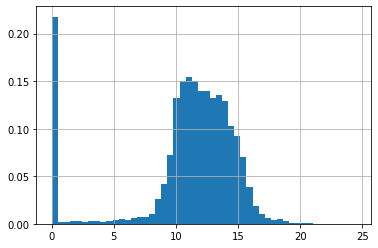

In [34]:
full_data['rougher.output.concentrate_ag'].hist(density=True, bins=50) 

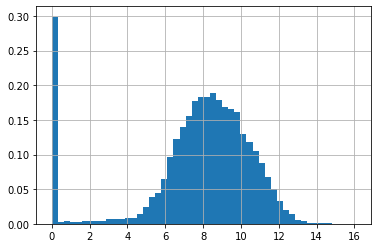

In [35]:
full_data['primary_cleaner.output.concentrate_ag'].hist(density=True, bins=50) 

In [36]:
full_data['final.output.concentrate_ag'].mean()

4.781559451695084

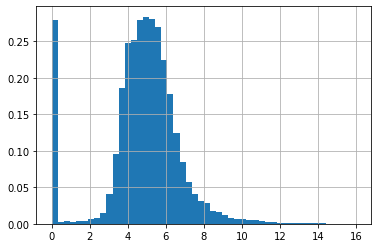

In [37]:
full_data['final.output.concentrate_ag'].hist(density=True, bins=50) 

### вот AU наоборот увеличивается

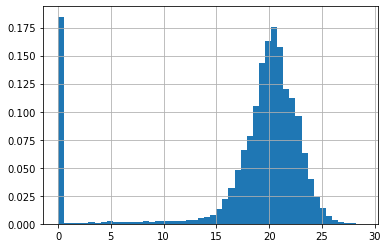

In [38]:
full_data['rougher.output.concentrate_au'].hist(density=True, bins=50) 

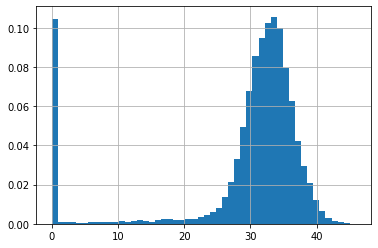

In [39]:
full_data['primary_cleaner.output.concentrate_au'].hist(density=True, bins=50) 

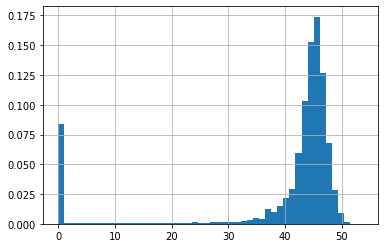

In [40]:
full_data['final.output.concentrate_au'].hist(density=True, bins=50) 

### показатели pb чуть подросли

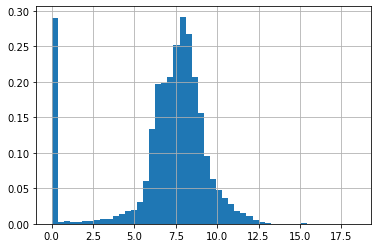

In [41]:
full_data['rougher.output.concentrate_pb'].hist(density=True, bins=50) 

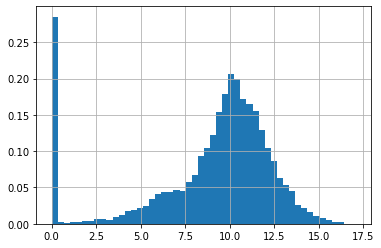

In [42]:
full_data['primary_cleaner.output.concentrate_pb'].hist(density=True, bins=50) 

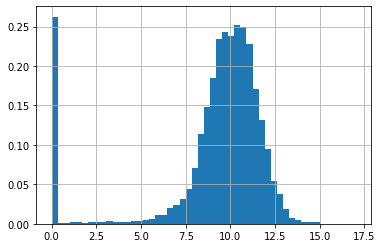

In [43]:
full_data['final.output.concentrate_pb'].hist(density=True, bins=50) 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
Не до конца удобный графический анализ - на одном рисунке было бы эффектнее). НО видно, что золотишко растёт - и это хорошо, кому-то).<br>
а свинец - побочное дитя химических реакций)

### <font color='orange'>Я так и не научилась строить красивые графики на одном рисунке... может, есть какой-ниб туториал попроще?</font>

In [44]:
******

SyntaxError: invalid syntax (<ipython-input-44-b09ebdbe9a8e>, line 1)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u>
<font color='green'><br>ОК, один из вариантов примерно такой: по идее, должен работать)

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize": (15, 8)})
sns.set_style("whitegrid")

In [91]:
def plots(v_list, v):
    '''....
    '''
    
    for col in v_list:
        sns.distplot(full_data[col].dropna(), label=col)
    plt.xlabel('Концентрация')
    plt.ylabel('Уровень')
    plt.title(f'Динамика концентрации {v} на различных этапах')
    plt.legend()
    plt.show()


In [92]:
au_concentrate = []
for col in full_data.columns:
    if 'output.concentrate_au' in col or 'rougher.input.feed_au' in col:
        au_concentrate.append(col)


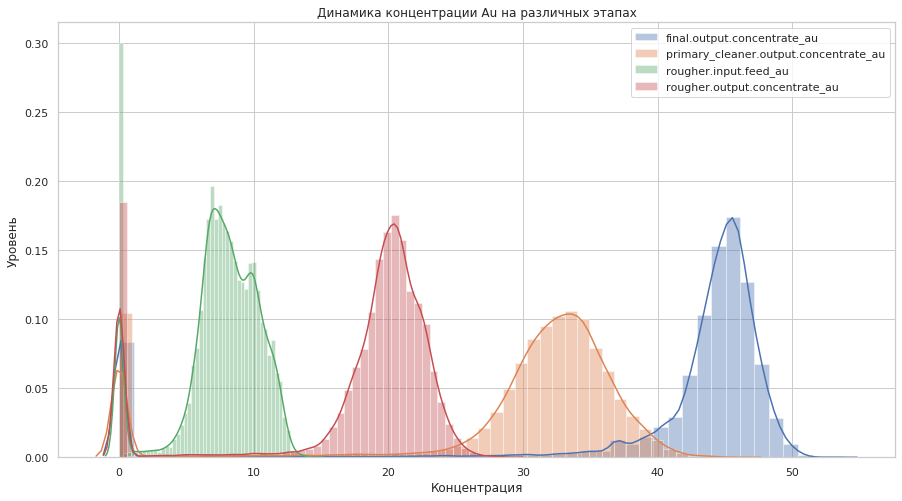

In [93]:
plots(au_concentrate, 'Au')

In [ ]:
***************************************

### Ниже смотрим распределения размеров гранул сырья на тестовой и тренинговой выборках. 
Распределения в целом отличаются не сильно. что еще про них сказать, если честно, не знаю..

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
ОК)

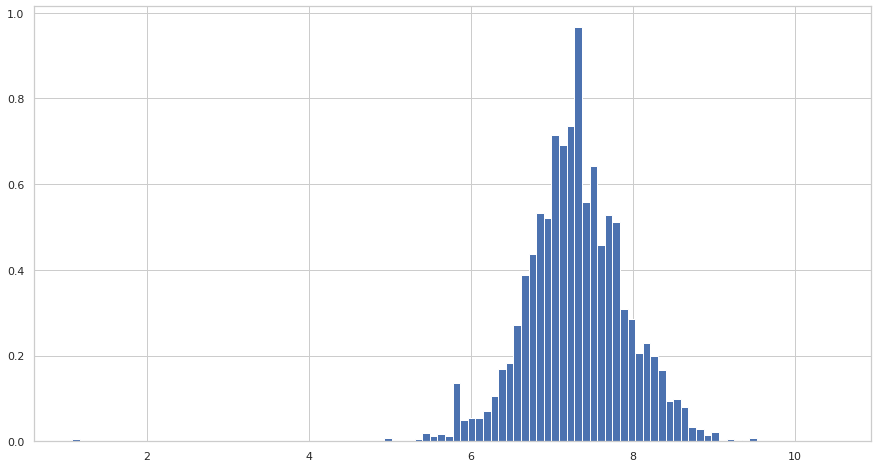

In [99]:
train_data['primary_cleaner.input.feed_size'].hist(density=True, bins=100) 

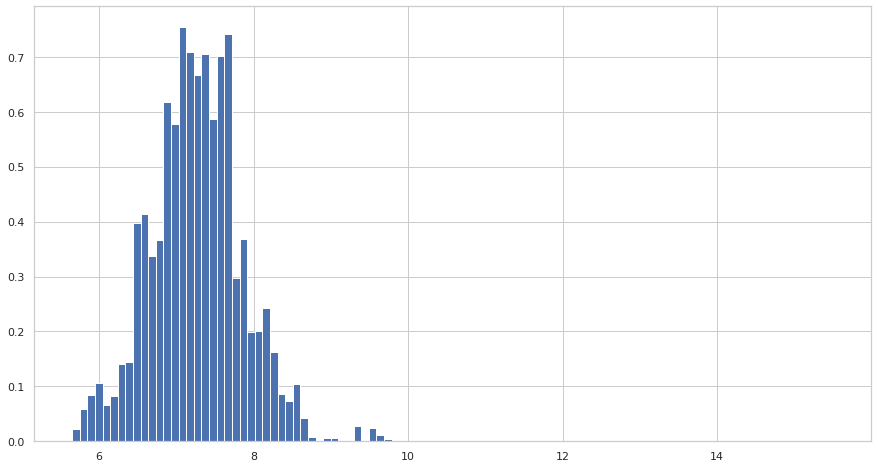

In [100]:
test_data['primary_cleaner.input.feed_size'].hist(density=True, bins=100) 

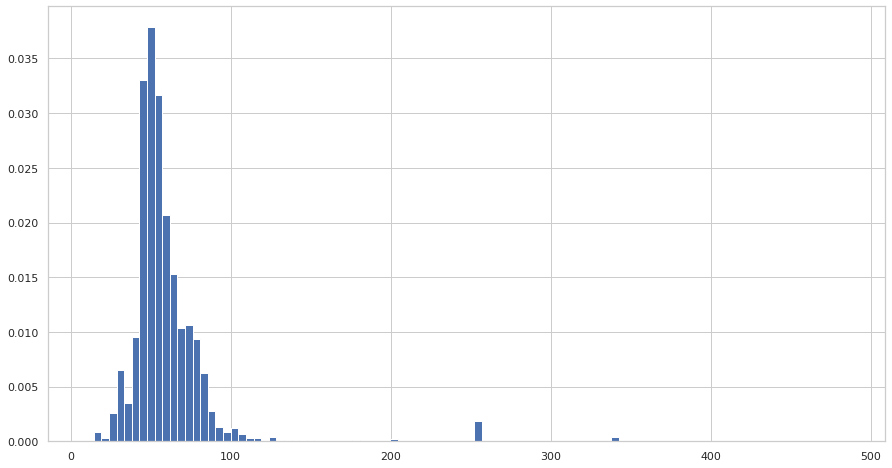

In [101]:
train_data['rougher.input.feed_size'].hist(density=True, bins=100) 

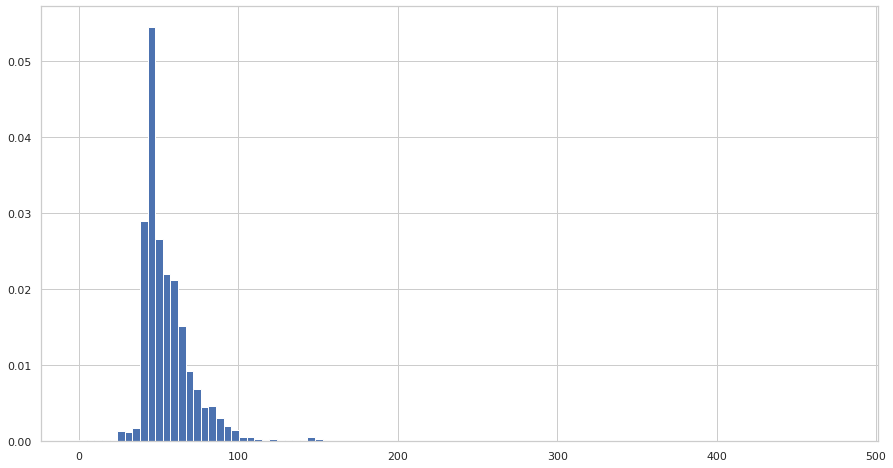

In [102]:
test_data['rougher.input.feed_size'].hist(density=True, bins=100) 

### Приступим к исследованию концентрации всех веществ на разных стадиях. По графикам видно, что явно выделяются нулевые значения. Нулевые значения нужно будет удалить из тестовой и тренировочной выборок, вероятно, чтобы предсказания модели были лучше

In [50]:
full_data['sum_concentrate_ag'] = full_data['rougher.input.feed_ag'] + full_data['final.output.concentrate_ag'] + full_data['primary_cleaner.output.concentrate_ag'] + full_data['rougher.output.concentrate_ag']
full_data['sum_concentrate_pb'] = full_data['rougher.input.feed_pb'] + full_data['final.output.concentrate_pb'] + full_data['primary_cleaner.output.concentrate_pb'] + full_data['rougher.output.concentrate_pb']
full_data['sum_concentrate_au'] = full_data['rougher.input.feed_au'] + full_data['final.output.concentrate_au'] + full_data['primary_cleaner.output.concentrate_au'] + full_data['rougher.output.concentrate_au']

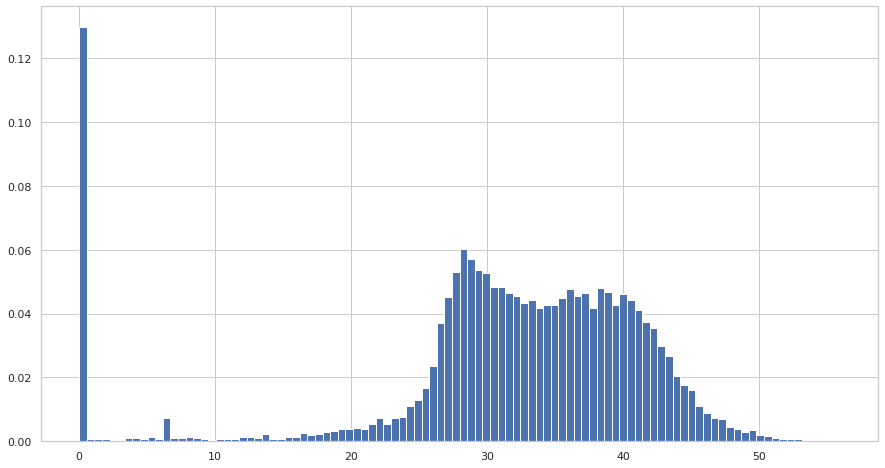

In [51]:
full_data['sum_concentrate_ag'].hist(density=True, bins=100) 

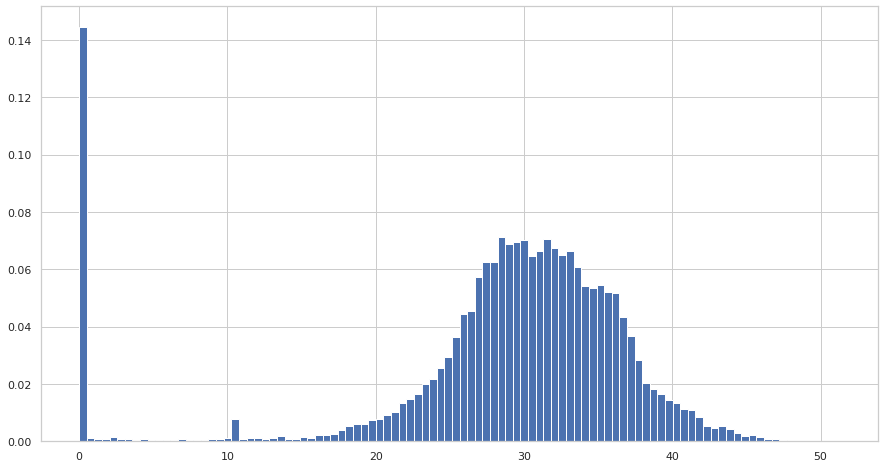

In [52]:
full_data['sum_concentrate_pb'].hist(density=True, bins=100) 

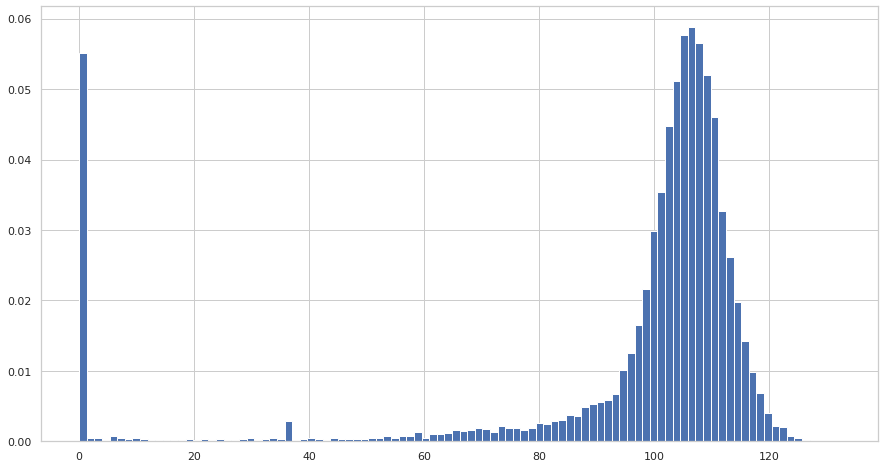

In [53]:
full_data['sum_concentrate_au'].hist(density=True, bins=100) 

In [54]:
test_data.drop(test_data[test_data['rougher.input.feed_ag']==0].index, inplace=True)

In [55]:
train_data.drop(train_data[train_data['rougher.input.feed_ag']==0].index, inplace=True)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
В некоторых проектах - это важно, избавиться от выбросов<br>

И вот если обратиться к нашему проекту:<br>
1) Есть нулевые аномалии - и их надо "убить" это точно: просто зачем нам нулевые измерения.<br>
    
2)А вот с выбросами как в приниципе..<br>
Тут на обсуждение: наша цель - предсказывать модель на реальных данных. И вот эти выбросы - это и есть реальная концентрация. И нам важно, чтобы модель умела и их тоже видеть и обрабатывать. Если их убрать из модели, то получится, что у нас она станет как бы искусственной. Т.е. будет работать только в небольших диапазонах - потому что обучалась только в них.<br>
    
Поэтому, тут так: выбросы - это не всегда то, от чего надо избавляться))) Ещё зависит от бизнес-задачи.<br>
    
Кстати<br>
если говорить о теории выбросов, то вот это интервал q3+-1.5*iqr говорит действильно о них самых<br>
Но нет рекоммендаций к их удалению. Говорят так "на усмотрение бизнеса".<br>
А вот если взять вот этот интервал q3+3*iqr:  то тут уж с очень высокой вероятность можно говорить о грубых выбросах.

# 3. Модель

### Функции для расчета итогой smape готовы

In [56]:
def smape (target, predicted): 
    x = (abs(target - predicted))/((abs(target) + abs(predicted))/2)*100
    x = x.sum()
    return ((1/len(target)) * x)

### Тоже готова, только зачем она нужна, если в кросс-валидации мы используем smape

In [57]:
def final_smape():
    x = (0.25*smape(target_rougher_test, predicted_rougher))+(0.75*smape(target_final_test, predicted_final))
    return x

In [58]:
test_data = test_data.dropna().reset_index(drop=True)

In [59]:
target_rougher_train = train_data['rougher.output.recovery']
target_rougher_test = test_data['rougher.output.recovery']

In [60]:
target_final_train = train_data['final.output.recovery']
target_final_test = test_data['final.output.recovery']

In [61]:
features_train = train_data.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
features_test = test_data.drop(['rougher.output.recovery','final.output.recovery'], axis=1)

In [62]:
model_rougher = LinearRegression()
model_rougher.fit(features_train,target_rougher_train)
predicted_rougher = model_rougher.predict(features_test)

In [63]:
smape(target_rougher_test, predicted_rougher)

10.1667247239304

In [64]:
model_final = LinearRegression()
model_final.fit(features_train,target_final_train)
predicted_final = model_final.predict(features_test)

In [65]:
smape(target_final_test, predicted_final)

10.76490027465918

In [66]:
final_smape()

10.615356386976984

### С помощью make_scorer создаем scorer для подачи в кроссвалидацию

In [67]:
my_scorer = make_scorer(smape, greater_is_better=False)

In [68]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()

In [69]:
final_score1 = cross_val_score(model1, features_train, target_rougher_train, scoring=my_scorer, cv=5) 
final_score1.mean()

-12.496448006773843

In [70]:
final_score2 = cross_val_score(model2, features_train, target_rougher_train, scoring=my_scorer, cv=5) 
final_score2.mean()

-32.05523277630057

In [71]:
final_score3 = cross_val_score(model3, features_train, target_rougher_train, scoring=my_scorer, cv=5) 
final_score3.mean()

-20.63742089986859

### Попробуем найти лучшие параметры для дерева решений, только цикл отрабатывает только по отдельности.. пришлось так подбирать. плюс final_score получается отрицательным..

In [125]:
best_result = -50
best_depth = 0
for depth in range (1, 10):
    model = RandomForestRegressor(random_state=12345, max_depth=depth)
    result = cross_val_score(model, features_train, target_rougher_train, scoring=my_scorer, cv=5).mean()
    if result > best_result:
        best_result = result
        best_depth = depth
print('score: ', result, 'глубина: ', best_depth)

KeyboardInterrupt: 

In [ ]:
best_result = -50
best_est = 0
for est in range(98, 103):
    model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=3)
    result = cross_val_score(model, features_train, target_rougher_train, scoring=my_scorer, cv=5).mean()
    if result > best_result:
        best_result = result
        best_est = est
print('score: ', result, 'кол-во деревьев: ', best_est)

### Лучший результат для набора данных final и для rougher показало дерево решений с подобранной глубиной и количеством деревьев.

In [72]:
model4 = RandomForestRegressor(random_state=12345, max_depth=4, n_estimators=102)

In [73]:
final_score4 = cross_val_score(model4, features_train, target_rougher_train, scoring=my_scorer, cv=5) 
final_score4.mean()

-13.927502444804423

In [74]:
final_score5 = cross_val_score(model1, features_train, target_rougher_train, scoring=my_scorer, cv=5) 
final_score5.mean()

-12.496448006773843

In [75]:
final_score_final1 = cross_val_score(model4, features_train, target_final_train, scoring=my_scorer, cv=5) 
final_score_final1.mean()

-11.219990934098607

In [76]:
final_score_final2 = cross_val_score(model1, features_train, target_final_train, scoring=my_scorer, cv=5) 
final_score_final2.mean()

-14.03795928348994

### Проверка на тестовых данных для rougher показала даже результаты чуть лучше, для final чуть хуже

In [119]:
final_score_rougher_test = cross_val_score(model4, features_test, target_rougher_test, scoring=my_scorer, cv=5) 
final_score_rougher_test.mean()

-9.093917209869103

In [120]:
final_score_final_test = cross_val_score(model4, features_test, target_final_test, scoring=my_scorer, cv=5) 
final_score_final_test.mean()

-9.775119310367739

In [ ]:
********

In [78]:
from sklearn.dummy import DummyRegressor
dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(features_train, target_rougher_train)
dummy_rougher_pred = dummy_regressor_rougher.predict(features_test)
smape_dummy_rougher = smape(target_rougher_test, dummy_rougher_pred)
print(smape_dummy_rougher)

9.287493365476555


In [79]:
dummy_regressor_final = DummyRegressor(strategy="median")
dummy_regressor_final.fit(features_train, target_final_train) # target_rougher_train) # здесь надо чуть изменить
dummy_final_pred = dummy_regressor_final.predict(features_test)
smape_dummy_final = smape(target_final_test, dummy_final_pred)
print(smape_dummy_final)

11.005383704941123


In [ ]:
******

In [80]:
final_smape = (0.25*smape_dummy_rougher)+(0.75*smape_dummy_final)
final_smape

10.57591112007498

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
Алина, интересную работу ты провела.<br>
Понятно, логично, вдумчиво<br>
Видна хорошая предвариателная работа с данными, уместный графический анализ, осмысленная аналитика и дельная модельная работа - многое удалось как надо)<br>
    
Метрика - достаточно низкая. И это хорошо.<br>
вот только не понятно насколько))<br>
По хорошему, здесь надо понять: наша модель предсказывает лучше, чем просто по среднему.<br>
(Например в формулу метрики предиктом подставить медианные значения таргет-трайна). <br>
<font color='red'>
Покажи, пожалуйста, сравнение и вывод относительно константной модели)
<font color='green'>    
Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ!
</b></font>

### <font color='orange'>Сравнение с константной моделью показывает, что в нашей модели все оч плохо... если результаты константной модели гораздо лучше... И нужно ли было сравнивать с применением кросс-валидации? </font>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
<font color='green'><br>Посмотри, пожалуйст код выше. Он позволяет расчитть константное значение. Сейчас там для одной целевой. Добавь, пожалуйста для второй. А потом обущую финальную для всех. А по поводу отрицательных - там надо просто умножить на -1. Это особенность функции валидации.<br>
    
И график в концентрациях - посмотри, пожалуйста. Должен строить...

### <font color='orange'>Ну, наша модель показывает лучше результат, чем по константной,хоть по rougher это совсем чуть-чуть. А можешь пояснить, почему мы обучали наши модели через кросс-валидацию, а константную модель не нужно через кросс-валидацию? Выше, функция с графиками не пропускает NaNы, может, у тебя есть на примете какой-ниб туториал, чтобы я могла потом потренироваться?</font>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 3</u></b>
<font color='green'><br>Привет, Алина!<br>
Чуть подкорректировал константную - там у тебя описка случилась с названием (пометил в коде)<br>

Теперь видно, что наша модель и константная - примерно одинаковые и это допустимо в этом проекте). Что же тогда ещё для дальнейшего улучшения качества моделирования возможно сделать?<br>
Попробовал систематизировать:<br>
1) качество данных на входе: ещё раз оценить аномалии, пропуски, соответствие физике (правдиво ли всё)<br>
2) Работа с моделями:<br>
- Генерация и поиск бизнес-факторов для моделирования: возможно что-то упустили, или придумать что-то гибридное из имеющихся факторов... В общем ещё раз пройтись по бизнес-цепочке процесса<br>
- Подбор самих моделей. показателей самих моделей <br>
- Подбор параметров выбранных показателей у выбранных моделей <br>
    
3)Плюс, есть же ещё параметры самого процесса: температура, скорость конвейера, сила удара чего-то там....<br> Они тоже могут помочь<br>
4) ну и разобраться ещё раз с физическими и производственными процессами. ВОзможно приниципиально иное решение можно создать.<br> 
    
В общем-то другого и нет. Только такие возможности.<br>
Если углубится в так называемый "Статистический анализ данных" (SPC) - по сути это превариетльная подготовка данных в этом проекте, можно найти какое-нибудь решение<br>

Но цель проекта достигнута:<br>
1) пройдены важные этапы построения производственной модели<br>
2) возникло много дополнительных вопросов))<br>
    
C графиком: надо nan-ы удалить и график построится)<br>
Посмотри, пожалуйста, сейчас получилось.<br>
Думаю, что не плохо будет документация по библиотеке seaborn. Так и набрать в инете. И часто выскакивают разные документы с примерами. Их можно рассматривать и изучать.<br>


Спасибо за работу) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!    

In [125]:
const_rougher = pd.Series(target_rougher_train.mean(), index=target_rougher_train.index)
const_rougher

0        83.053613
1        83.053613
2        83.053613
3        83.053613
4        83.053613
           ...    
12674    83.053613
12675    83.053613
12676    83.053613
12677    83.053613
12678    83.053613
Length: 12679, dtype: float64

In [126]:
final_score_const = cross_val_score(model4, features_train, const_rougher, scoring=my_scorer, cv=5) 
final_score_const.mean()

-4.482940331826673e-12

In [127]:
const_final = pd.Series(target_final_train.mean(), index=target_final_train.index)
const_final

0        66.646583
1        66.646583
2        66.646583
3        66.646583
4        66.646583
           ...    
12674    66.646583
12675    66.646583
12676    66.646583
12677    66.646583
12678    66.646583
Length: 12679, dtype: float64

In [128]:
final_score_const1 = cross_val_score(model4, features_train, const_final, scoring=my_scorer, cv=5) 
final_score_const1.mean()

-3.880732431239927e-12

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке